In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('synthetic_data.tsv',sep='\t')

In [6]:
X1 = df.iloc[:,0:3].values
print(X1)

[[-1.  -1.  -1. ]
 [-1.  -1.  -0.9]
 [-1.  -1.  -0.8]
 ...
 [ 1.   1.   0.8]
 [ 1.   1.   0.9]
 [ 1.   1.   1. ]]


In [7]:
X_var = ['A','B','C']

In [3]:
df.head()

,A,B,C,y
0,-1.0,-1.0,-1.0,-0.606520
1,-1.0,-1.0,-0.9,-0.813881
2,-1.0,-1.0,-0.8,-0.986353
3,-1.0,-1.0,-0.7,-1.127664
4,-1.0,-1.0,-0.6,-1.241228


In [20]:
X = df[X_var].values
Y = df['y'].values

In [9]:
X.shape

(9261, 3)

In [5]:
Y.shape

(9261,)

In [11]:
test_fraction=0.20

In [12]:
random_state=42

In [21]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(X, Y, test_size=test_fraction, random_state=random_state)

In [ ]:
X = np.array(data_train)
Y = np.array(labels_train)

In [14]:
labels_test.shape

(1853,)

In [10]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


In [11]:
model = MLPRegressor(
    hidden_layer_sizes=(20, 20),  activation='tanh', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=100000, shuffle=True,
    random_state=9, tol=0.000001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)



In [12]:

clf = model.fit(data_train, labels_train)

In [13]:
test_y = clf.predict(data_test)

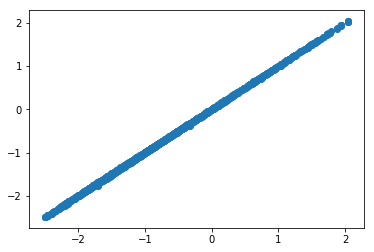

In [14]:
plt.scatter(labels_test,test_y,)

In [15]:
clf.score(data_test,labels_test)

0.9999184004864747

In [16]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


#Sequential is fully-connected models.It is linear stack of layers

* Dense is one of core layers. There are other options such as Conv1D, Conv2D
* Available activation: softmax, elu,relu,selu, softplus,softsign,tanh,sigmoid,hard sigmoid,linear
* Available Initilizer(For weight): Zeros, Ones, COnstant,Arguments, RandomUniform,RandomNoemal,Truncated Normal. Variance Scaling, Orthogonol.Identity, lecun_uniform,glorot_normal,glorot_uniform,he_normal,lecun_normal,he_uiform
* Customer Initializer(backend):shape and dtype to be defined
* Developing new regularizers: Any Function takes a weight matrix and returns a loss contribution


In [22]:
num_layers = 3
num_neurons = [20,20,1]
n_x = 3
n_epochs = 150
batch_sizes = 10

In [18]:
param = {'layer_number':[1,2,3],'activation':['tanh','sigmoid','linear','relu'],'neurons':[1, 5, 10, 15, 20, 25, 30]}

In [38]:
def Grid_Search(param,X,Y):
    import keras
    best_score = 0.0
    best_activation = ['none','none','none']
    for param1 in param:
        for param2 in param:
                model = keras.Sequential()
                model.add(keras.layers.Dense(20,input_dim=3,activation=param1))
                model.add(keras.layers.Dense(1,activation=param2))
                
                
                model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
                model.fit(X,Y,epochs=150, batch_size=10,verbose=0)
                
                scores = model.evaluate(X,Y)
                if scores[1] > best_score:
                    best_score = scores[1]
                    best_activation = [param1,param2]
                else:
                    pass
    
    print(best_score, best_activation)
                
        

In [39]:
activation = ['tanh','linear','relu']


In [40]:
Grid_Search(param=activation,X=X,Y=Y)

7408/7408 [==============================] - 0s 51us/step
0.00040496760259179265 ['tanh', 'linear']


In [48]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras import Sequential
import keras
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(keras.layers.Dense(20, input_dim=3,activation=activation))
	model.add(keras.layers.Dense(1, activation='linear'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
	return model

# create model
model = KerasRegressor(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['tanh','linear','relu']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



KeyboardInterrupt: 

In [49]:
model = keras.Sequential()
model.add(keras.layers.Dense(num_neurons[0],input_dim=n_x,activation='tanh',
                            use_bias=False,kernel_initializer='glorot_uniform',
                            kernel_regularizer=None,
                            activity_regularizer=None,kernel_constraint=None))
model.add(keras.layers.Dense(num_neurons[1],kernel_initializer='glorot_uniform',activation='linear'))
model.add(keras.layers.Dense(num_neurons[2],kernel_initializer='glorot_uniform',activation='relu'))


In [42]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [44]:
model.fit(X,Y, epochs=n_epochs, batch_size=batch_sizes,verbose=0)

In [45]:
Test_x = np.array(data_test)
Test_y = np.array(labels_test)

In [46]:
scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7408/7408 [==============================] - 0s 16us/step

acc: 0.00%


In [47]:
predict = model.predict(Test_x)

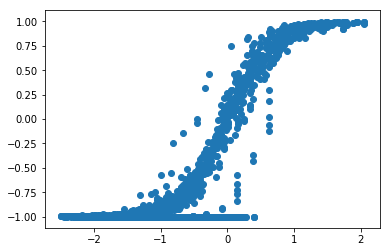

In [48]:
plt.scatter(Test_y,predict)